# League of Legends NA Challenger Analysis
### By: Chris Luo    

#### Overview

For my Data Bootcamp project, I analyzed some factors that could correlate to a player's win rate in the popular MOBA game League of Legends. Using the open-source library [Cassiopeia](http://cassiopeia.readthedocs.io/en/latest/index.html) as well as the developer key linked to my League of Legends account, I was able to pull the data of players in the Challenger tier (top 200 players) on the North American server. 

Since my analysis was performed only on players in NA Challenger, its implications should not be considered broadly with respect to the general playerbase. Additionally, since the data is on ranked statistics for the current season (season 7) and there are various factors (team composition, champion-specific proficiency, team communication, etc.) that can lead to victory/defeat, this analysis is far from conclusive. Nevertheless, this analysis can provide some interesting insights into the highest level of play. Hopefully you have as much fun reading this as I did making this!

#### Analysis and Disclaimers
A simple multivariable linear regression analysis will be performed with win rate as the dependent variable. The normality of the distribution will be evaluated, and the Ordinary Least Squares method will be utilized to generate regression results for the test model. Since this is a simple experiment/exercise in Python, this project will not explore heteroskedasticity, specification bias, collinearity, and other concerns. In turn, the results from this project should not be treated as particularly substantial.

#### Cassiopeia
Cassiopeia is an open source library used to access Riot API. Installing Cassiopeia will also naturally install SQLAlchemy.

##### command:
`
pip install cassiopeia   
`

## Setup
In the following steps, I import necessary modules and access the Riot Games API to pull data on the players in NA Challenger.

In [1]:
import os                                             # to access system environment variables
import pandas as pd                                   # data management
import seaborn as sns                                 # for data visualization
import matplotlib.pyplot as plt                       # for plots
import statsmodels.formula.api as smf                 # for regression output
import datetime as dt                                 # date information
from cassiopeia import riotapi                        # to access Riot Games API
from cassiopeia.type.core.common import LoadPolicy    # to utilize delayed loading policy

# IPython command, puts plots in notebook 
%matplotlib inline

In [2]:
print('Last Updated', dt.date.today())

Last Updated 2017-05-11


In [3]:
riotapi.set_region("NA")                              # sets the region to North America (rip Dyrus)
key = os.environ["DEV_KEY"]                           # grabs my API key from my environment variables
riotapi.set_api_key(key)                              # my dev key is specific to my account
riotapi.set_load_policy(LoadPolicy.lazy)              # lazy -> delays loading certain objects for improved time + data usage

### Challenger Data
The players in Challenger tier are retrieved and stored in challenger_league, a 'League' object. Afterwards, the 'Summoner' object of each entry/player is taken and stored in the list called challenger.

In [4]:
challenger_league = riotapi.get_challenger()
challenger_league

In [5]:
challenger = [entry.summoner for entry in challenger_league]

In [6]:
challenger[0] #summoner.Summoner object of highest rank player in challenger

In [7]:
challenger[0].name

'consensual clown'

The method below returns a dictionary of ranked statistics for a player based on the champion played. Using the key [None] returns aggregate ranked statistics of all champions played by the summoner. This aggregate data can be pulled in JSON format.
```
challenger[0].ranked_stats()
```

In [8]:
challenger[0].ranked_stats()[None] 

In [9]:
challenger[0].ranked_stats()[None].to_json() #returns data in JSON format

'{\n    "averageAssists": 0,\n    "averageChampionsKilled": 0,\n    "averageCombatPlayerScore": 0,\n    "averageNodeCapture": 0,\n    "averageNodeCaptureAssist": 0,\n    "averageNodeNeutralize": 0,\n    "averageNodeNeutralizeAssist": 0,\n    "averageNumDeaths": 0,\n    "averageObjectivePlayerScore": 0,\n    "averageTeamObjective": 0,\n    "averageTotalPlayerScore": 0,\n    "botGamesPlayed": 0,\n    "killingSpree": 1257,\n    "maxAssists": 0,\n    "maxChampionsKilled": 23,\n    "maxCombatPlayerScore": 0,\n    "maxLargestCriticalStrike": 2800,\n    "maxLargestKillingSpree": 10,\n    "maxNodeCapture": 0,\n    "maxNodeCaptureAssist": 0,\n    "maxNodeNeutralize": 0,\n    "maxNodeNeutralizeAssist": 0,\n    "maxNumDeaths": 14,\n    "maxObjectivePlayerScore": 0,\n    "maxTeamObjective": 0,\n    "maxTimePlayed": 2956,\n    "maxTimeSpentLiving": 1602,\n    "maxTotalPlayerScore": 0,\n    "mostChampionKillsPerSession": 23,\n    "mostSpellsCast": 0,\n    "normalGamesPlayed": 0,\n    "rankedPremadeG

## DataFrame
The ranked stats of each player in Challenger for the current season is converted into a series (list-like structure), then appended into a dataframe (matrix-like structure). This dataframe has player data as row entries and ranked statistics by columns.

In [10]:
df = pd.DataFrame()
for player in challenger:
    stats = pd.read_json(player.ranked_stats()[None].to_json(), typ = 'series')
    df = df.append(stats, ignore_index=True)

Below is a view of the dataframe for the top 5 players. Several of the fields are left as 0.0 as information for them are not recorded for ranked statistics.

In [11]:
df.head()

,averageAssists,averageChampionsKilled,averageCombatPlayerScore,averageNodeCapture,averageNodeCaptureAssist,averageNodeNeutralize,averageNodeNeutralizeAssist,averageNumDeaths,averageObjectivePlayerScore,averageTeamObjective,...,totalNodeNeutralize,totalPentaKills,totalPhysicalDamageDealt,totalQuadraKills,totalSessionsLost,totalSessionsPlayed,totalSessionsWon,totalTripleKills,totalTurretsKilled,totalUnrealKills
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,33695993.0,6.0,234.0,544.0,310.0,26.0,580.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,27467761.0,8.0,278.0,619.0,341.0,63.0,734.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26591653.0,5.0,266.0,593.0,327.0,39.0,643.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23239757.0,2.0,155.0,367.0,212.0,34.0,328.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,63875407.0,11.0,218.0,496.0,278.0,52.0,759.0,0.0


In [12]:
df.shape #200 player entries, 56 field columns

(200, 56)

In [13]:
df.columns

Index(['averageAssists', 'averageChampionsKilled', 'averageCombatPlayerScore',
       'averageNodeCapture', 'averageNodeCaptureAssist',
       'averageNodeNeutralize', 'averageNodeNeutralizeAssist',
       'averageNumDeaths', 'averageObjectivePlayerScore',
       'averageTeamObjective', 'averageTotalPlayerScore', 'botGamesPlayed',
       'killingSpree', 'maxAssists', 'maxChampionsKilled',
       'maxCombatPlayerScore', 'maxLargestCriticalStrike',
       'maxLargestKillingSpree', 'maxNodeCapture', 'maxNodeCaptureAssist',
       'maxNodeNeutralize', 'maxNodeNeutralizeAssist', 'maxNumDeaths',
       'maxObjectivePlayerScore', 'maxTeamObjective', 'maxTimePlayed',
       'maxTimeSpentLiving', 'maxTotalPlayerScore',
       'mostChampionKillsPerSession', 'mostSpellsCast', 'normalGamesPlayed',
       'rankedPremadeGamesPlayed', 'rankedSoloGamesPlayed', 'totalAssists',
       'totalChampionKills', 'totalDamageDealt', 'totalDamageTaken',
       'totalDeathsPerSession', 'totalDoubleKills', 'total

Note: following code not updated, but still correctly conveys that all fields are of datatype float

In [16]:
df.dtypes #all values are floats

averageAssists                 float64
averageChampionsKilled         float64
averageCombatPlayerScore       float64
averageNodeCapture             float64
averageNodeCaptureAssist       float64
averageNodeNeutralize          float64
averageNodeNeutralizeAssist    float64
averageNumDeaths               float64
averageObjectivePlayerScore    float64
averageTeamObjective           float64
averageTotalPlayerScore        float64
botGamesPlayed                 float64
killingSpree                   float64
maxAssists                     float64
maxChampionsKilled             float64
maxCombatPlayerScore           float64
maxLargestCriticalStrike       float64
maxLargestKillingSpree         float64
maxNodeCapture                 float64
maxNodeCaptureAssist           float64
maxNodeNeutralize              float64
maxNodeNeutralizeAssist        float64
maxNumDeaths                   float64
maxObjectivePlayerScore        float64
maxTeamObjective               float64
maxTimePlayed            

### Data Manipulation
Since some of the fields I wanted were not available or were filled with 0.0s, I decided to add in fields to the dataframe for future usage. Below, average assists, average kills, average deaths, win rate, and average gold earned have been included.

In [14]:
df['averageAssists'] = df['totalAssists']/df['totalSessionsPlayed']            # will overwrite the 'averageAssists' field
df['averageKills'] = df['totalChampionKills']/df['totalSessionsPlayed']
df['averageDeaths'] = df['totalDeathsPerSession']/df['totalSessionsPlayed']
df['winRate'] = df['totalSessionsWon']/df['totalSessionsPlayed']
df['averageGoldEarned'] = df['totalGoldEarned']/df['totalSessionsPlayed']

As an example, the average assists of the top 5 players from the newly included averageAssists series can be seen below.

In [15]:
df['averageAssists'].head()

0    9.439338
1    6.143780
2    7.291737
3    8.702997
4    7.548387
Name: averageAssists, dtype: float64

### Win Rate
As the dependent variable of my linear regression model, the win rate variable is explored in the following blocks. Below is a plot of the win rates for all 200 players from highest to lowest rank (left to right).

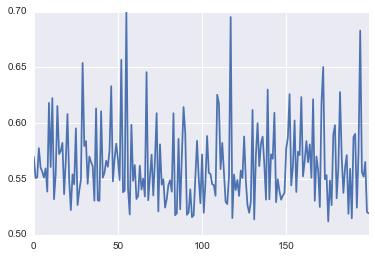

In [16]:
df['winRate'].plot()

From the descriptive statistics below, it is interesting to note that the win rates of all players in Challenger are above 50%. This makes sense as the ranked positions of all players are reset at the end of each season, and top players must climb the ranked ladder in order to get into Challenger. Thus, successfully winning at least as many games as losses seems like a necessary, but not sufficient condition to make it into Challenger.

In [17]:
df['winRate'].describe()

count    200.000000
mean       0.562747
std        0.035235
min        0.511966
25%        0.537510
50%        0.555040
75%        0.579916
max        0.699659
Name: winRate, dtype: float64

Before moving onto the test model, the normality of the distribution of the win rates is evaluated. With a normally distribution, the skewness is 0 (neither skewed to the left or right) and the kurtosis is 3 ("tailedness" of the distribution). Since the win rate distribution has a positive skewness and a kurtosis less than 3, the distribution is skewed to the right and has a platykurtic distribution (peak looks flatter). A sample of 200 of the top players in a region is not be expected to be normally distributed, and the skew towards a higher win rate as well as a platykurtic distribution (fewer and less influential outliers) seem to represent this. Nevertheless, a multivariate linear regression will be performed on this dataset despite failing the normality condition. 

In [18]:
df['winRate'].skew() # positive skewness -> skewed to the right (skewed to higher winrate)

1.2270547412733261

In [19]:
df['winRate'].kurt() # kurtosis less than 3 -> platykurtic 

1.8704934902598502

C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


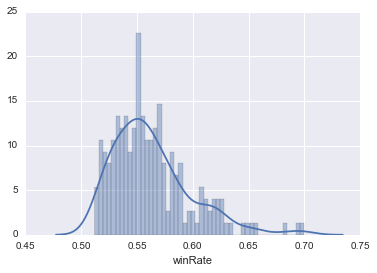

In [20]:
sns.distplot(df['winRate'], bins=50)

## Multivariate Linear Regression Models

#### Test Model 1

`
WINRATE = B0 + B1(GOLD) + B2(KDA) + B3(TURRETS) + B4(DIFF) + B5(GAMES)
`

- WINRATE: winRate
- B0 : intercept
- B1 to B5 : coefficients
- GOLD : averageGoldEarned
- KDA : kda; kill-death-assist ratio; (average kills + average assists)/average deaths
- TURRETS : averageTurretsKilled
- DIFF : averageDamageDifferential; (damage dealt - damage taken + total healing)/games played
- GAMES : totalSessionsPlayed

### Expectations
- GOLD is expected to have a positive effect on WINRATE; a higher GOLD value expresses that a player should be more influential in an average game (can buy more wards, have more of their build completed, etc.)
- KDA is expected to have a positive effect on WINRATE; a higher KDA value should indirectly help a team achieve their goals (greater participation in kills, dying less to the enemy team)
- TURRETS is expected to have a positive effect on WINRATE; a higher TURRETS value can be seen as a player being more objective-focused
- DIFF is expected to have a positive effect on WINRATE; a higher DIFF value suggests being more useful to a team (dealing more damage than taken and/or providing healing)
- GAMES is expected to have a negative effect on WINRATE; a higher GAMES value can lead to a more stable WINRATE (more solidified win rate that tends to be lower)

In [21]:
df['kda'] = (df['averageAssists'] + df['averageKills'])/df['averageDeaths']
df['averageTurretsKilled'] = df['totalTurretsKilled']/df['totalSessionsPlayed']
df['averageDamageDifferential'] = (df['totalDamageDealt'] - df['totalDamageTaken'] + df['totalHeal'])/df['totalSessionsPlayed']

In [22]:
df.shape #200 players, 63 columns (7 added, 1 overwritten)

(200, 63)

### Scatterplots
Below are the scatterplots of each independent variable against win rate. They should help to visualize any relationships that arise within the data.

#### Average Gold Earned vs. Win Rate
Based on the plot below, the win rate range seems to widen as the average gold earned increases. Additionally, the players with the highest win rates tend to have average gold earned between 11,000 to 13,000. It is important to note that games do vary in length (like when SKT steamrolled Royal Club in the [Season 3 World Championship Finals](https://www.reddit.com/r/leagueoflegends/comments/1nrufd/spoiler_royal_club_vs_sk_telecom_t1_postmatch/)), so the average gold earned can also vary.

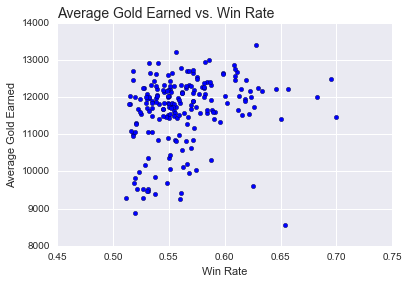

In [23]:
fig, ax = plt.subplots()
ax.scatter(df['winRate'], df['averageGoldEarned'])
ax.set_title('Average Gold Earned vs. Win Rate', loc='left', fontsize=14)
ax.set_xlabel('Win Rate')
ax.set_ylabel('Average Gold Earned')

#### KDA Ratio vs. Win Rate
Based on the plot below, the KDAs and win rates of most players seem to be clustered in the bottom left. As the KDA Ratio increases, there seems to be an upward trend in win rate. It should be noted that having a high KDA does not necessarily lead to a greater win rate, as being too aggressive or not focusing on objectives enough may be detrimental to a team's success.

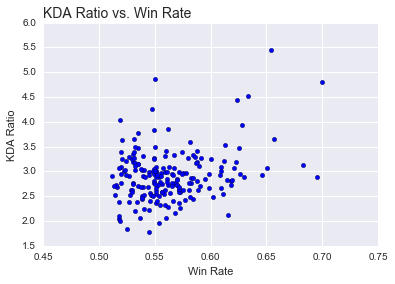

In [24]:
fig, ax = plt.subplots()
ax.scatter(df['winRate'], df['kda'])
ax.set_title('KDA Ratio vs. Win Rate', loc='left', fontsize=14)
ax.set_xlabel('Win Rate')
ax.set_ylabel('KDA Ratio')

#### Average Turrets Killed vs. Win Rate
Based on the plot below, it does not seem like the average turrets killed correlates with win rate. Players can also contribute to the team's victory without needing to kill a turret personally (such as letting minions finish off a turret after a push or having a laning partner take the turret).

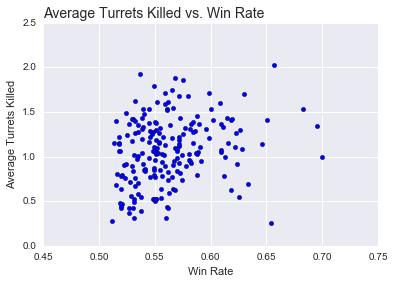

In [25]:
fig, ax = plt.subplots()
ax.scatter(df['winRate'], df['averageTurretsKilled'])
ax.set_title('Average Turrets Killed vs. Win Rate', loc='left', fontsize=14)
ax.set_xlabel('Win Rate')
ax.set_ylabel('Average Turrets Killed')

#### Average Damage Differential vs. Win Rate
Based on the plot below, most of the data points seem to be clustered within the average damage differential range of 100,000 to 150,000. Aside from a few data points, it seems that the players with the highest win rates tend to be within that range. Players below that range seem to have win rates on the lower end of the spectrum, suggesting that they may not be contributing enough (in team fights or being effective in their particular roles). It is important to note that certain roles are not expected to contribute as much in terms of damage output, so a support main can still have a high WINRATE value despite having a consistently low DIFF.

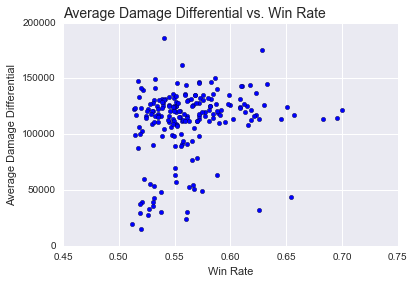

In [26]:
fig, ax = plt.subplots()
ax.scatter(df['winRate'], df['averageDamageDifferential'])
ax.set_title('Average Damage Differential vs. Win Rate', loc='left', fontsize=14)
ax.set_xlabel('Win Rate')
ax.set_ylabel('Average Damage Differential')

#### Games Played vs. Win Rate
This plot expresses that the number of games played is inversely proportional to a player's win rate. As the number of games a player plays increases, that player's respective win rate decreases, approaching the lower limit of 50%. This relationship seems to make sense given the pool of NA Challenger players. With fewer ranked games played, a Challenger player has a greater portion of games played at lower tiers due to climbing the ranked ladder, so that player's win rate would be higher. Additionally, players on win streaks can climb the ladder faster, and can enter into Challenger with a higher than average win rate.

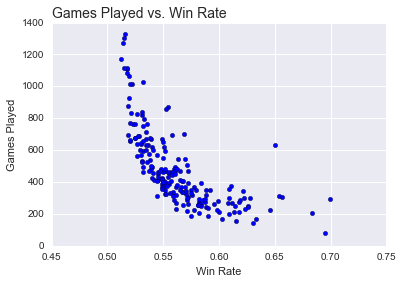

In [27]:
fig, ax = plt.subplots()
ax.scatter(df['winRate'], df['totalSessionsPlayed'])
ax.set_title('Games Played vs. Win Rate', loc='left', fontsize=14)
ax.set_xlabel('Win Rate')
ax.set_ylabel('Games Played')

## OLS Regression
Based on the test model established before

#### Test Model 1

`
WINRATE = B0 + B1(GOLD) + B2(KDA) + B3(TURRETS) + B4(DIFF) + B5(GAMES)
`

regression output using the Ordinary Least Squares method is generated below using the StatsModel module. The "winRate" is passed as the dependent variable while the other variables are passed as independent variables in the "model" argument string.


In [28]:
model = 'winRate ~ averageGoldEarned + kda + averageTurretsKilled + averageDamageDifferential + totalSessionsPlayed'
results = smf.ols(model, data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                winRate   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     49.14
Date:                Thu, 11 May 2017   Prob (F-statistic):           1.06e-32
Time:                        21:37:30   Log-Likelihood:                 467.68
No. Observations:                 200   AIC:                            -923.4
Df Residuals:                     194   BIC:                            -903.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     0.5016      0.046     10.849      0.000         0.410     0.593
averageGoldEarned          3.407e-06   4.79e-06      0.712      0.477     -6.03e-06  1.28e-05
kda                           0.0180      0.004      5.016      0.000         0.011     0.025
averageTurretsKilled          0.0175      0.007      2.617      0.010         0.004     0.031
averageDamageDifferential -5.839e-08   1.25e-07     -0.468      0.641     -3.05e-07  1.88e-07
totalSessionsPlayed       -9.006e-05   7.32e-06    -12.310      0.000        -0.000 -7.56e-05
==============================================================================
Omnibus:                       53.654   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.346
Skew:                           1.270   Prob(JB):                     1.09e-24
Kurtosis:                       5.606   Cond. No.                     3.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test Model 1 Analysis

#### Test Model 1:

`
WINRATE = 0.5016 + 0.000003407(GOLD) + 0.0180(KDA) + 0.0175(TURRETS) - 0.00000005839(DIFF) - 0.00009006(GAMES)
`

From our regression results, the R-squared statistic of 0.559 expresses that 55.9% of the variability in the data is accounted for in the linear regression model. Adjusting for the number of predictors within the model, the adjusted R-squared statistic is 0.547 or 54.7%. Through these r-squared values, the regression results seem to suggest that the model is somewhat good at explaining the variability in the data. Nevertheless, a couple of the explanatory variables within the model have insignificant t-values and high p-values. A high r-squared statistic and a few significant t-values suggest that the model might be suffering from a classical case of multicollinearity (two or more predictor values are highly correlated). To deal with multicollinearity, variables that are insignificant will be dropped in the second test model.

The variables with insignificant t-values and high p-values are GOLD and DIFF

(`
194 degrees of freedom: |t-values| < approx. 2, p-values > alpha of 0.05
` | [t-value table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf) ). 

In turn, the second test model will only have the following independent variables: KDA, TURRETS, GAMES.

#### Test Model 2:

`
WINRATE = B0 + B1(KDA) + B2(TURRETS) + B3(GAMES)
`

In [29]:
model2 = 'winRate ~ kda + averageTurretsKilled + totalSessionsPlayed'
results2 = smf.ols(model2, data=df).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                winRate   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     82.31
Date:                Thu, 11 May 2017   Prob (F-statistic):           1.67e-34
Time:                        21:37:34   Log-Likelihood:                 467.39
No. Observations:                 200   AIC:                            -926.8
Df Residuals:                     196   BIC:                            -913.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.5337      0.014     37.123      0.000         0.505     0.562
kda                      0.0175      0.004      4.990      0.000         0.011     0.024
averageTurretsKilled     0.0203      0.005      4.118      0.000         0.011     0.030
totalSessionsPlayed  -9.076e-05   7.21e-06    -12.582      0.000        -0.000 -7.65e-05
==============================================================================
Omnibus:                       52.380   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.426
Skew:                           1.251   Prob(JB):                     1.28e-23
Kurtosis:                       5.528   Cond. No.                     4.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test Model 2 Analysis

#### Test Model 2:

`
WINRATE = 0.5337 + 0.0175(KDA) + 0.0203(TURRETS) - 0.00009076(GAMES)
`

Using the second test model, there is a slight drop in r-squared from 0.559 to 0.558 as well as a slight increase in adjusted r-squared from 0.547 to 0.551, suggesting that this model is better at explaining the variability in the data than the first test model.

Moreover, given the Durbin-Watson of 2.080, we do not reject the null hypothesis of no autocorrelation.

(`
196 degrees of freedom, 3 regressors excluding intercept: 1.704 < DW value of 2.080 < 2.296
` | [durbin-watson tables](https://www3.nd.edu/~wevans1/econ30331/Durbin_Watson_tables.pdf) )

## Conclusion

### Regression Model Analysis
Based on the second test model, it is noted that KDA and TURRETS have a positive correlation with WINRATE, while GAMES has a negative correlation with WINRATE. Since the OLS regression expresses a high r-squared statistic of 0.558 and adjusted r-squared of 0.551, it can be argued that this model can effectively explain the win rates of NA Challenger players. By having a high KDA ratio, a high number of turrets killed on average, and low amount of games, a Challenger player is expected to have a relatively high win rate. The results expressed seem to fall in line with the expectations outlined earlier, but it was interesting to see that GOLD and DIFF were not significant variables within the model. This may be due to multicollinearity, which is not explored in this project. For instance, KDA and GOLD should be correlated, since getting kills and assists add to a player's gold count. In the scatterplot "Average Turrets Killed vs. Win Rate," while there appeared to not be any correlation between TURRETS and WINRATE, it seemed that such was not the case as TURRETS had a significant, positive relationship with WINRATE. Finally, in the scatterplot "Games Played vs. Win Rate," the inverse relationship between GAMES and WINRATE was distinctly expressed, and had the largest (absolute) t-value of the independent variables.

### Final Thoughts
From this experiment, nothing particularly ground-breaking was found. It is not surprising that a player's KDA ratio, average turrets killed, and games played does reflect on that player's ranked win rate. For more meaningful insights, data can be drawn from the ranked matches that a player has played, but retrieving that information for 200 players would take significantly more time and work beyond the scope of this project. Additionally, this experiment can be made more rigorous by including White's General Test for Heteroskedasticity, omitted variable tests, influence statistics, and other tests/measures. Thank you for spending the time to read this, and I hope this was enjoyable!

[( ͡° ͜ʖ ͡°)](https://www.youtube.com/watch?v=XdN67NuhMW4)